<a href="https://colab.research.google.com/github/doommodery/neural/blob/main/%22%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%E2%84%963_%D0%A1%D0%B2%D0%B5%D1%80%D1%82%D0%BE%D1%87%D0%BD%D1%8B%D0%B5_%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D1%8B%D0%B5_%D1%81%D0%B5%D1%82%D0%B8_(CNN)_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание №1. Использование глубокой сверточной нейронной сети для классификации предметов одежды на примере датасета Fashion MNIST


**В качестве интерфейса для работы с моделями используйте [Gradio](https://colab.research.google.com/drive/18EM8mrpURStkmbxWjZybWbWh23Si5b4A#scrollTo=-uu_VR8H2K4h)**

[Техническая документация по датасету](https://www.kaggle.com/datasets/zalando-research/fashionmnist)

## 1.1. Устанавливаем необходимые зависимости

In [188]:
from keras.datasets import fashion_mnist # импорт исходного датасета
from keras.models import Sequential

from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

from keras.optimizers import Adam, SGD
import matplotlib.pyplot as plt
import numpy as np

## 1.2. Разделяем данные на обучающую и тестовую выборку

In [189]:
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()

print('Train: X = ', trainX.shape)
print('Test: X = ', testX.shape)

Train: X =  (60000, 28, 28)
Test: X =  (10000, 28, 28)


Нормализация входных данных

In [190]:
from tensorflow import keras

train_X = trainX / 255
test_X = testX / 255

train_Y = keras.utils.to_categorical(trainy, 10) # Перобразование в OneHot Encoding
test_Y = keras.utils.to_categorical(testy, 10) # Перобразование в OneHot Encoding

train_X = np.expand_dims(train_X, -1)
test_X = np.expand_dims(test_X, -1)

print(train_X.shape)
print(test_X.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [191]:
print(train_Y)

[[0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## 1.3. Визуализируем часть данных из датасета

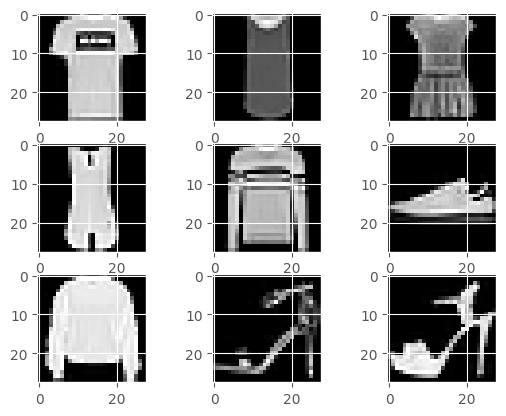

In [192]:
for i in range(1, 10):
    plt.subplot(3, 3, i)
    plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))

plt.show()

## 1.4. Создаём архитектуру нейронной сети и компилируем модель

In [193]:
# Ваш код
model = Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')
])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_69 (Conv2D)                   │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_57 (MaxPooling2D)      │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_70 (Conv2D)                   │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_58 (MaxPooling2D)      │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_23 (Flatten)                 │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_64 (Dense)                     │ (None, 128)                 │         401,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_65 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 421,642 (1.61 MB)

 Trainable params: 421,642 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

## 1.5. Обучаем модель

In [194]:
# Ваш код
EPOCH = 3

model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])


history = model.fit(train_X, train_Y, batch_size=50, epochs=EPOCH, validation_split=0.2)

Epoch 1/3
960/960 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7777 - loss: 0.6240 - val_accuracy: 0.8850 - val_loss: 0.3205
Epoch 2/3
960/960 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8888 - loss: 0.3048 - val_accuracy: 0.8904 - val_loss: 0.3057
Epoch 3/3
960/960 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9096 - loss: 0.2463 - val_accuracy: 0.9089 - val_loss: 0.2509


## 1.6. Анализируем обученную модель. Строим график (графики) обучения

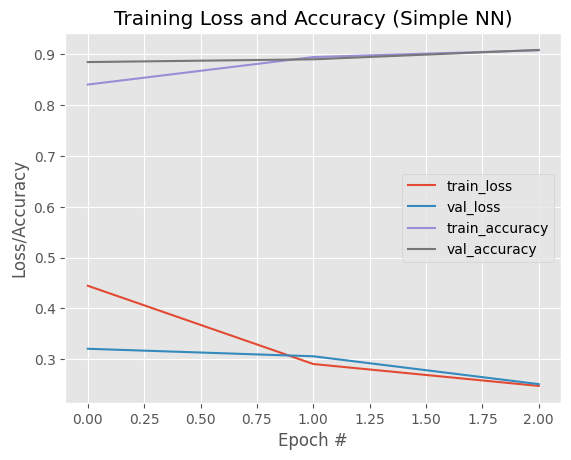

In [195]:
# Ваш код
N = np.arange(0, EPOCH)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, history.history["loss"], label="train_loss")
plt.plot(N, history.history["val_loss"], label="val_loss")
plt.plot(N, history.history["accuracy"], label="train_accuracy")
plt.plot(N, history.history["val_accuracy"], label="val_accuracy")
plt.title("Training Loss and Accuracy (Simple NN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

## 1.7. Загружаем свои изображения. С помощью функции predict() получаем предсказание нейронной сети



> Требуется получить предсказания минимум по 5 изображениям, каждое из которых относится к разному классу. Не забудьте добавить метки к каждому классу (для этого можно просто создать список строк, каждая из которых будет соответствовать классу с определенным индексом см. [тех.док.](https://www.kaggle.com/datasets/zalando-research/fashionmnist)). Процент уверенности нейронной сети в своём предсказании выводить обязательно.



In [196]:
from sklearn.preprocessing import LabelBinarizer
from keras.models import load_model
import pickle

model.save('model_fashion.keras')

labels = LabelBinarizer()
labels.fit_transform(train_Y)

with open('labels_fashion', 'wb') as f:
  f.write(pickle.dumps(labels))

print(labels.classes_)

[0 1 2 3 4 5 6 7 8 9]


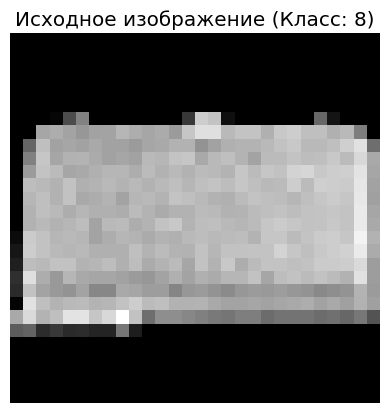

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step

🔍 **Результат предсказания:**
----------------------------------------
Класс          Название            Вероятность
----------------------------------------
0              0                   0.00017
1              1                   0.00001
2              2                   0.00008
3              3                   0.00002
4              4                   0.00001
5              5                   0.00000
6              6                   0.00009
7              7                   0.00022
8              8                   0.99932
9              9                   0.00008
----------------------------------------
🎯 **Лучший прогноз:** 8 (99.93%)


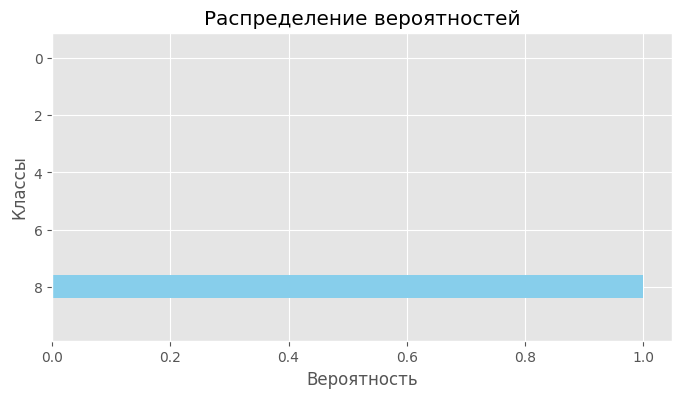

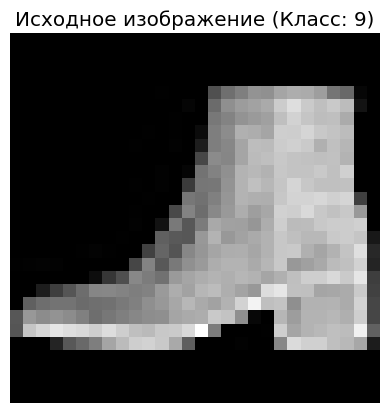

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step

🔍 **Результат предсказания:**
----------------------------------------
Класс          Название            Вероятность
----------------------------------------
0              0                   0.00000
1              1                   0.00000
2              2                   0.00000
3              3                   0.00000
4              4                   0.00000
5              5                   0.00002
6              6                   0.00000
7              7                   0.00000
8              8                   0.00000
9              9                   0.99997
----------------------------------------
🎯 **Лучший прогноз:** 9 (100.00%)


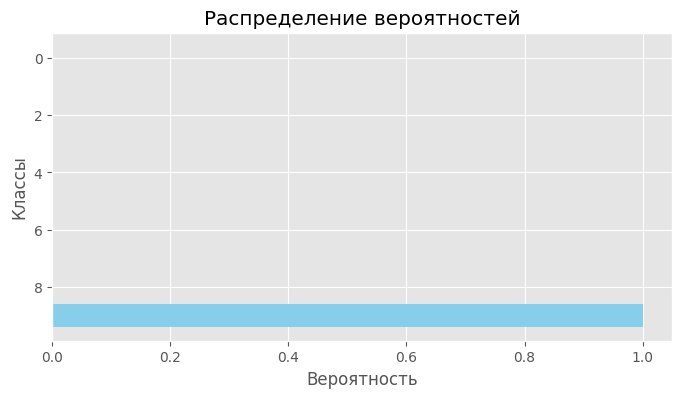

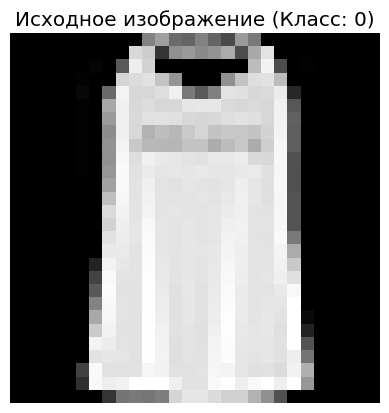

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step

🔍 **Результат предсказания:**
----------------------------------------
Класс          Название            Вероятность
----------------------------------------
0              0                   0.31473
1              1                   0.03120
2              2                   0.00712
3              3                   0.06079
4              4                   0.01041
5              5                   0.00000
6              6                   0.57487
7              7                   0.00001
8              8                   0.00084
9              9                   0.00002
----------------------------------------
🎯 **Лучший прогноз:** 6 (57.49%)


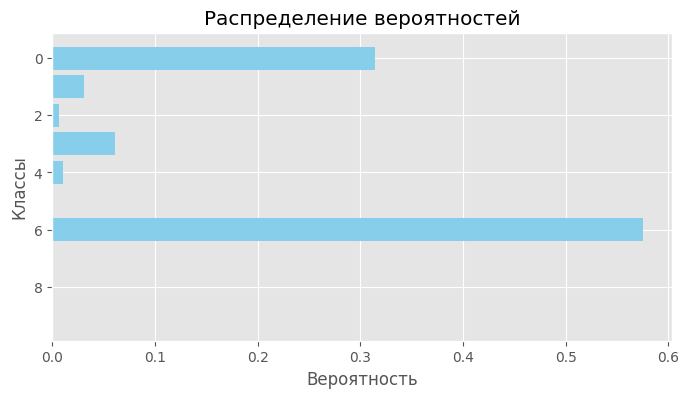

In [197]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from tensorflow.keras.models import load_model

def predict_fashion(image, model_path='model_fashion.keras', labels_path='labels_fashion'):
    model = load_model(model_path)
    lb = pickle.loads(open(labels_path, 'rb').read())  # Загружаем лейблы классов

    img = image.reshape(-1, 28, 28, 1)  # Приводим к нужному формату
    preds = model.predict(img)[0]  # Получаем предсказания

    class_names = lb.classes_ if hasattr(lb, "classes_") else [str(i) for i in range(len(preds))]  # Названия классов

    # Выводим предсказания в удобочитаемом виде
    print("\n🔍 **Результат предсказания:**")
    print("-" * 40)
    print(f"{'Класс':<15}{'Название':<20}{'Вероятность'}")
    print("-" * 40)

    for i in range(len(preds)):
        print(f"{i:<15}{class_names[i]:<20}{preds[i]:.5f}")

    best_idx = preds.argmax()
    print("-" * 40)
    print(f"🎯 **Лучший прогноз:** {class_names[best_idx]} ({preds[best_idx]:.2%})")

    # Визуализация предсказаний
    plt.figure(figsize=(8, 4))
    plt.barh(class_names, preds, color='skyblue')
    plt.xlabel("Вероятность")
    plt.ylabel("Классы")
    plt.title("Распределение вероятностей")
    plt.gca().invert_yaxis()
    plt.show()

# --- Тестирование ---
num = np.random.randint(0, 9999, size=3)  # Тестируем 3 случайных примера
for i in range(len(num)):
    plt.imshow(test_X[num[i]], cmap='gray')
    plt.axis('off')
    plt.title(f'Исходное изображение (Класс: {test_Y[num[i]].argmax()})')
    plt.show()

    predict_fashion(test_X[num[i]])  # Вызываем предсказание



# Задание №2. Использование глубокой сверточной нейронной сети для классификации изображений по своему датасету


## 2.1.  Используя датасет, собранный для предыдущей работы, разработайте и обучите **свою** модель глубокой  **сверточной** нейронной сети для классификации изображений







In [198]:
# Импортируем LabelBinarizer для преобразования текстовых меток в векторы
# (например, "кошка" -> [1, 0, 0], "собака" -> [0, 1, 0], "панда" -> [0, 0, 1])
from sklearn.preprocessing import LabelBinarizer

# Импортируем train_test_split для разделения данных на обучающую и тестовую выборки
from sklearn.model_selection import train_test_split

# Импортируем classification_report для оценки качества классификации
from sklearn.metrics import classification_report

# Импортируем Sequential для создания последовательной модели нейронной сети
from keras.models import Sequential

# Импортируем Dense для создания плотных слоев нейронной сети
from keras.layers import Dense

# Импортируем SGD и Adam для оптимизации обучения нейронной сети
from keras.optimizers import SGD, Adam

# Импортируем paths из imutils для удобной работы с путями к изображениям
from imutils import paths

# Импортируем pyplot из matplotlib для визуализации данных
import matplotlib.pyplot as plt

# Импортируем numpy для работы с массивами данных
import numpy as np

# Импортируем random для генерации случайных чисел
import random

# Импортируем pickle для сериализации и десериализации данных
import pickle

# Импортируем cv2 для работы с изображениями
import cv2

# Импортируем os для работы с файловой системой
import os

# Импортируем cv2_imshow из google.colab.patches для отображения изображений в Colab
from google.colab.patches import cv2_imshow

In [199]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [200]:
import os
import zipfile
import random
from imutils import paths

# Путь к ZIP-архиву
zip_path = '/content/drive/MyDrive/animals.zip'

# Временная директория для извлечения файлов
extract_path = '/content/animals_extracted'

# Создаем временный каталог, если он не существует
os.makedirs(extract_path, exist_ok=True)

# Словарь для переименования папок
translate = {
    "cane": "dog",
    "cavallo": "horse",
    "elefante": "elephant",
    "farfalla": "butterfly",
    "gallina": "chicken",
    "gatto": "cat",
    "mucca": "cow",
    "pecora": "sheep",
    "scoiattolo": "squirrel",
    "ragno": "spider"
}

# Открываем ZIP-архив
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    # Получаем список всех файлов в архиве
    file_list = zip_ref.namelist()

    # Фильтруем файлы, которые находятся в папке raw-img
    raw_img_files = [f for f in file_list if f.startswith('raw-img/') and not f.endswith('/')]

    # Обрабатываем каждый файл
    for file in raw_img_files:
        # Извлекаем имя папки (животного) из пути
        folder_name = file.split('/')[1]  # Например, "cane", "gatto" и т.д.

        # Переименовываем папку, если это необходимо
        if folder_name in translate:
            new_folder_name = translate[folder_name]
        else:
            new_folder_name = folder_name  # Если папка не в словаре, оставляем как есть

        # Создаем папку для животного, если она еще не существует
        animal_folder_path = os.path.join(extract_path, new_folder_name)
        os.makedirs(animal_folder_path, exist_ok=True)

        # Извлекаем файл в соответствующую папку
        zip_ref.extract(file, animal_folder_path)
        print(f"Extracted '{file}' to '{animal_folder_path}'")

# Список для хранения путей к изображениям
imagesPath = []

# Проходим по всем папкам с животными
for animal_folder in os.listdir(extract_path):
    folder_path = os.path.join(extract_path, animal_folder)

    # Получаем список файлов в папке
    files = list(paths.list_images(folder_path))

    # Ограничиваем количество файлов до 200
    if len(files) > 400:
        files = files[:400]

    # Добавляем файлы в общий список
    imagesPath.extend(files)

# Перемешиваем список путей к изображениям
random.shuffle(imagesPath)

# Теперь imagesPath содержит пути к 200 файлам из каждой папки
print(f"Total images: {len(imagesPath)}")

Выходные данные были обрезаны до нескольких последних строк (5000).
Extracted 'raw-img/ragno/OIP-MVQChNQpHiMZEVMPehrvoAHaE6.jpeg' to '/content/animals_extracted/spider'
Extracted 'raw-img/ragno/OIP-MVdIFDAFpNyK_XCpwkDIWgHaFj.jpeg' to '/content/animals_extracted/spider'
Extracted 'raw-img/ragno/OIP-MYY_8k5AHqMJwTCNXfH6rwHaFj.jpeg' to '/content/animals_extracted/spider'
Extracted 'raw-img/ragno/OIP-MZEVXuoMsATG8u_UuTQ6hAHaE8.jpeg' to '/content/animals_extracted/spider'
Extracted 'raw-img/ragno/OIP-MZg0tznDRE95AMfyuutuYAHaE6.jpeg' to '/content/animals_extracted/spider'
Extracted 'raw-img/ragno/OIP-M_r9DkR2X5gP0P5-z8wPYQHaE7.jpeg' to '/content/animals_extracted/spider'
Extracted 'raw-img/ragno/OIP-M_xDUSzjlF3-w9XHCm93cgHaFF.jpeg' to '/content/animals_extracted/spider'
Extracted 'raw-img/ragno/OIP-MbI4-bMyutRX3X382IAVcQAAAA.jpeg' to '/content/animals_extracted/spider'
Extracted 'raw-img/ragno/OIP-MbMksZdD7gomsC9fd6cpKgHaHJ.jpeg' to '/content/animals_extracted/spider'
Extracted 'raw-img/ragn

In [201]:
def load_images(imagePaths, compression_size=32):
    """
    Функция для загрузки изображений и преобразования их в векторы признаков.

    Args:
        imagePaths: список путей к изображениям.
        compression_size: размер сжатия изображения.

    Returns:
        data: список векторов признаков (сжатых изображений, преобразованных в векторы).
        labels: список меток классов.
    """
    data = []
    labels = []

    for imagePath in imagePaths:
        # Загрузка изображения
        image = cv2.imread(imagePath)
        if image is None:
            print(f"Warning: Unable to load image at {imagePath}")
            continue

        # Изменение разрешения изображения
        image = cv2.resize(image, (compression_size, compression_size))

        # Нормализация изображения
        image = image.astype("float") / 255.0

        # Преобразование изображения в одномерный вектор
        image = image.flatten()

        # Добавление изображения в список
        data.append(image)

        # Извлечение метки класса из пути к изображению
        label = imagePath.split(os.path.sep)[-2]

        # Добавление метки в список
        labels.append(label)

    return data, labels

data, labels = load_images(imagesPath, 64)

In [202]:
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

print(data.shape)

(X_train, X_test, Y_train, Y_test) = train_test_split(data, labels, test_size=0.1)

lb = LabelBinarizer()
Y_train = lb.fit_transform(Y_train)
Y_test = lb.transform(Y_test)

print(X_train.shape)
print(X_test.shape)

(4000, 12288)
(3600, 12288)
(400, 12288)


In [203]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.regularizers import l2

model_my = Sequential([
    Conv2D(64, (3,3), padding='same', activation='relu', input_shape=(64, 64, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2), strides=2),
    Dropout(0.25),

    Conv2D(128, (3,3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2), strides=2),
    Dropout(0.25),

    Conv2D(256, (3,3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2), strides=2),
    Dropout(0.25),

    Flatten(),
    Dense(256, activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model_my.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_71 (Conv2D)                   │ (None, 64, 64, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 64, 64, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_59 (MaxPooling2D)      │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_72 (Conv2D)                   │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 32, 32, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_60 (MaxPooling2D)      │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_73 (Conv2D)                   │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 16, 16, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_61 (MaxPooling2D)      │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_24 (Flatten)                 │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_66 (Dense)                     │ (None, 256)                 │       4,194,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_67 (Dense)                     │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,570,762 (17.44 MB)

 Trainable params: 4,569,354 (17.43 MB)

 Non-trainable params: 1,408 (5.50 KB)

In [204]:
print(Y_train.shape)

(3600, 10)


In [205]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, Reshape

# Flatten the input data
X_train_flattened = X_train.reshape(X_train.shape[0], -1)  # Reshape to (num_samples, 64*64*3)

# Define the model
model_my = Sequential()
model_my.add(Dense(128, activation='relu', input_shape=(64*64*3,)))  # Input shape matches flattened data
model_my.add(Dense(64, activation='relu'))
model_my.add(Dense(10, activation='softmax'))  # Выходной слой для 10x10x10

# Compile the model
model_my.compile(optimizer='adam',
                 loss='categorical_crossentropy',  # Используйте подходящую функцию потерь
                 metrics=['accuracy'])

# Train the model
history = model_my.fit(X_train_flattened, Y_train, batch_size=50, epochs=EPOCH, validation_split=0.2)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.1107 - loss: 2.3031 - val_accuracy: 0.0972 - val_loss: 2.3005
Epoch 2/3
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1255 - loss: 2.2958 - val_accuracy: 0.1431 - val_loss: 2.2862
Epoch 3/3
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1629 - loss: 2.2778 - val_accuracy: 0.1722 - val_loss: 2.2574


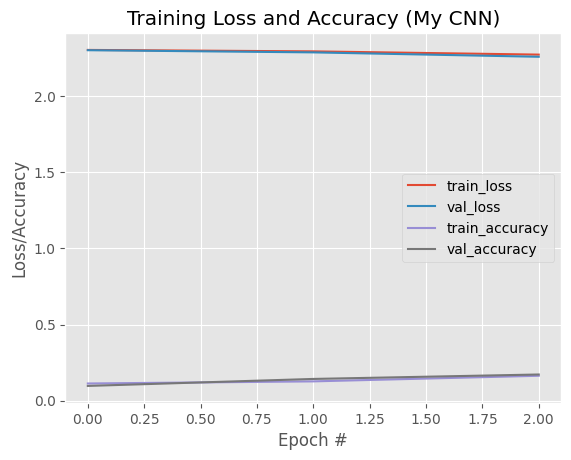

In [206]:
N = np.arange(0, EPOCH)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, history.history["loss"], label="train_loss")
plt.plot(N, history.history["val_loss"], label="val_loss")
plt.plot(N, history.history["accuracy"], label="train_accuracy")
plt.plot(N, history.history["val_accuracy"], label="val_accuracy")
plt.title("Training Loss and Accuracy (My CNN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

In [207]:
model_my.save('overfitting_model_my.keras')

Начальные веса, похоже, были очень хорошими и в результате наличия большого количества эпох модель очень сильно переобучилась из-за чего на тренировочной выборке точность достигла порядка 100%, а на валидационной с каждой эпохой падала (и росли потери).

В качестве решения этой проблемы добавлю EarlyStoping, соберу модель и обучу ее заново.

In [208]:
print(Y_train.shape)

(3600, 10)


In [209]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, Input
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.utils import to_categorical
from keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l2
from sklearn.model_selection import train_test_split

# Пример данных (замените на ваши реальные данные)
# X_train = np.random.rand(3600, 64, 64, 3)  # Пример данных изображений
# Y_train = np.random.randint(0, 10, size=(3600, 10))  # Пример меток (one-hot encoded)

# Проверка формы X_train
print("Shape of X_train before processing:", X_train.shape)  # Ожидаем (3600, 64, 64, 3)

# Нормализация данных
X_train = X_train.astype('float32') / 255.0

# Проверка формы Y_train перед обработкой
print("Shape of Y_train before processing:", Y_train.shape)  # (3600, 10)

# Преобразуем Y_train в одномерный массив, где каждый элемент представляет класс
Y_train = np.argmax(Y_train, axis=-1)  # Теперь форма (3600,)

# Убеждаемся, что классы находятся в диапазоне [0, 9]
num_classes = 10  # Изменили на 10 классов
Y_train = np.clip(Y_train, 0, num_classes - 1)  # Ограничиваем индексы

# Преобразуем в one-hot encoding
Y_train = to_categorical(Y_train, num_classes=num_classes)  # Теперь (3600, 10)

# Проверка формы после обработки
print("Shape of Y_train after processing:", Y_train.shape)  # Ожидаем (3600, 10)

# Разделение данных на обучающую и валидационную выборки
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

# Преобразование X_train и X_val обратно в 4D-тензор (если данные были "расплющены")
if X_train.ndim == 2:  # Проверяем, если данные одномерные
    X_train = X_train.reshape(-1, 64, 64, 3)  # Преобразуем в (num_samples, 64, 64, 3)
    X_val = X_val.reshape(-1, 64, 64, 3)

# Проверка формы после преобразования
print("Shape of X_train after reshaping:", X_train.shape)  # Ожидаем (2880, 64, 64, 3)
print("Shape of X_val after reshaping:", X_val.shape)  # Ожидаем (720, 64, 64, 3)

# Аугментация данных
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
datagen.fit(X_train)

# Определение модели
model_my = Sequential([
    Input(shape=(64, 64, 3)),  # Определяем входной размер
    Conv2D(32, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Dropout(0.25),  # Добавлен Dropout
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Dropout(0.25),  # Добавлен Dropout
    Conv2D(128, (3, 3), padding='same', activation='relu'),  # Добавлен новый слой
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(256, activation='relu', kernel_regularizer=l2(0.01)),  # Увеличен размер полносвязного слоя
    Dense(num_classes, activation='softmax')  # Выходной слой для 10 классов
])

# Компиляция модели с уменьшенным learning rate
model_my.compile(optimizer=Adam(learning_rate=0.0001),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

# Определение callback-ов
early_stopping = EarlyStopping(patience=5, verbose=1)
checkpoint = ModelCheckpoint(filepath="best_model_my.keras", monitor="val_accuracy", save_best_only=True, verbose=1)

# Обучение модели с аугментацией данных
EPOCH = 50  # Увеличено количество эпох
history = model_my.fit(
    datagen.flow(X_train, Y_train, batch_size=64),  # Обучающие данные
    validation_data=(X_val, Y_val),  # Валидационные данные
    epochs=EPOCH,
    callbacks=[early_stopping, checkpoint]
)

# Вывод результатов обучения
print("Обучение завершено.")

Shape of X_train before processing: (3600, 12288)
Shape of Y_train before processing: (3600, 10)
Shape of Y_train after processing: (3600, 10)
Shape of X_train after reshaping: (2880, 64, 64, 3)
Shape of X_val after reshaping: (720, 64, 64, 3)
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.0944 - loss: 6.7038
Epoch 1: val_accuracy improved from -inf to 0.10972, saving model to best_model_my.keras
45/45 ━━━━━━━━━━━━━━━━━━━━ 10s 100ms/step - accuracy: 0.0944 - loss: 6.6926 - val_accuracy: 0.1097 - val_loss: 5.2157
Epoch 2/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.0971 - loss: 4.8632
Epoch 2: val_accuracy did not improve from 0.10972
45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - accuracy: 0.0970 - loss: 4.8563 - val_accuracy: 0.0861 - val_loss: 3.9567
Epoch 3/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - accuracy: 0.1091 - loss: 3.7471
Epoch 3: val_accuracy did not improve from 0.10972
45/45 ━━━━━━━━━━━━━━━━━━━━ 5s 108ms/step - accuracy: 0.1090 - loss: 3.7430 - val_accuracy: 0.0861 - val_loss: 3.2132
Epoch 4/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.1100 - loss: 3.0914
Epoch 4: val_accuracy did not improve from 0.10972
45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - accuracy: 0.1100 - loss: 3.0891 - v

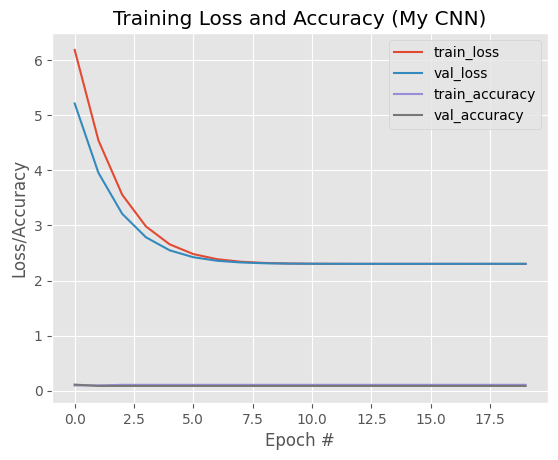

In [210]:
import numpy as np
import matplotlib.pyplot as plt

# Создаем массив N с длиной, равной количеству эпох
N = np.arange(0, len(history.history["loss"]))

# Настройка стиля графика
plt.style.use("ggplot")
plt.figure()

# Построение графиков
plt.plot(N, history.history["loss"], label="train_loss")
plt.plot(N, history.history["val_loss"], label="val_loss")
plt.plot(N, history.history["accuracy"], label="train_accuracy")
plt.plot(N, history.history["val_accuracy"], label="val_accuracy")

# Настройка заголовка и подписей
plt.title("Training Loss and Accuracy (My CNN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

# Отображение графика
plt.show()

## 2.2.   Ознакомьтесь с современными архитектурами сверточных нейронных сетей: [см. ссылку](https://medium.com/aiguys/how-cnn-architectures-evolved-c53d3819fef8). На основе рассмотренных архитектур, реализуйте (частично повторяя основные паттерны проектирования) и обучите модель сверточной нейронной сети. Укажите архитектуру, которой Вы "вдохновились"

In [211]:
# Ваш код

model_resnet_like = Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(64, 64, 3)),
    Conv2D(32, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(128, (3,3), padding='same', activation='relu'),
    Conv2D(128, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model_resnet_like.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_32"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_77 (Conv2D)                   │ (None, 64, 64, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_78 (Conv2D)                   │ (None, 64, 64, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_65 (MaxPooling2D)      │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_79 (Conv2D)                   │ (None, 32, 32, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_80 (Conv2D)                   │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_66 (MaxPooling2D)      │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_81 (Conv2D)                   │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_82 (Conv2D)                   │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_67 (MaxPooling2D)      │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_26 (Flatten)                 │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_73 (Dense)                     │ (None, 128)                 │       1,048,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_74 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,337,002 (5.10 MB)

 Trainable params: 1,337,002 (5.10 MB)

 Non-trainable params: 0 (0.00 B)

In [212]:
EPOCH = 20
checkpoint = ModelCheckpoint(filepath="best_model_resnet_like.keras", monitor="val_accuracy", save_best_only=True, verbose=0)

model_resnet_like.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

history_resnet_like = model_resnet_like.fit(X_train, Y_train, batch_size=50, epochs=EPOCH, validation_split=0.2, callbacks=[early_stopping, checkpoint])

Epoch 1/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 80ms/step - accuracy: 0.1018 - loss: 2.3041 - val_accuracy: 0.0833 - val_loss: 2.3034
Epoch 2/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.1106 - loss: 2.3021 - val_accuracy: 0.0833 - val_loss: 2.3034
Epoch 3/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.1155 - loss: 2.3020 - val_accuracy: 0.0833 - val_loss: 2.3041
Epoch 4/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.1053 - loss: 2.3021 - val_accuracy: 0.0833 - val_loss: 2.3050
Epoch 5/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.1189 - loss: 2.3020 - val_accuracy: 0.0833 - val_loss: 2.3056
Epoch 6/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.1141 - loss: 2.3021 - val_accuracy: 0.0833 - val_loss: 2.3055
Epoch 7/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.1034 - loss: 2.3028 - val_accuracy: 0.0833 - val_loss: 2.3054
Epoch 7: early stopping


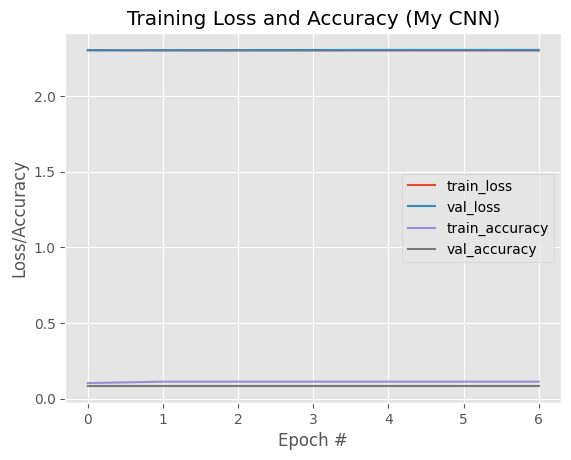

In [213]:
import numpy as np
import matplotlib.pyplot as plt

# Создаем массив N с длиной, равной количеству эпох
N = np.arange(0, len(history_resnet_like.history["loss"]))

# Настройка стиля графика
plt.style.use("ggplot")
plt.figure()

# Построение графиков
plt.plot(N, history_resnet_like.history["loss"], label="train_loss")
plt.plot(N, history_resnet_like.history["val_loss"], label="val_loss")
plt.plot(N, history_resnet_like.history["accuracy"], label="train_accuracy")
plt.plot(N, history_resnet_like.history["val_accuracy"], label="val_accuracy")

# Настройка заголовка и подписей
plt.title("Training Loss and Accuracy (My CNN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

# Отображение графика
plt.show()

## 2.3. Сохраните полученные модели

In [214]:
# сохранены в процессе обучения с помощью чекпоинта

## 2.4. Загрузите обученную модель из прошлой практической работы



## 2.5. Сравните между собой точность всех трёх моделей, подавая на вход одинаковые изображения (15 разных изображений). Сравните предсказания каждой из моделей и сделайте выводы

Model 1 Summary:


Model: "sequential_31"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_74 (Conv2D)                   │ (None, 64, 64, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_62 (MaxPooling2D)      │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_75 (Conv2D)                   │ (None, 32, 32, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_63 (MaxPooling2D)      │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_76 (Conv2D)                   │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_64 (MaxPooling2D)      │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_25 (Flatten)                 │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_71 (Dense)                     │ (None, 256)                 │       2,097,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_72 (Dense)                     │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,579,680 (25.10 MB)

 Trainable params: 2,193,226 (8.37 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,386,454 (16.73 MB)


Model 2 Summary:


Model: "sequential_31"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_74 (Conv2D)                   │ (None, 64, 64, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_62 (MaxPooling2D)      │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_75 (Conv2D)                   │ (None, 32, 32, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_63 (MaxPooling2D)      │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_76 (Conv2D)                   │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_64 (MaxPooling2D)      │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_25 (Flatten)                 │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_71 (Dense)                     │ (None, 256)                 │       2,097,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_72 (Dense)                     │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,579,680 (25.10 MB)

 Trainable params: 2,193,226 (8.37 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,386,454 (16.73 MB)


Model 3 Summary:


Model: "sequential_32"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_77 (Conv2D)                   │ (None, 64, 64, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_78 (Conv2D)                   │ (None, 64, 64, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_65 (MaxPooling2D)      │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_79 (Conv2D)                   │ (None, 32, 32, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_80 (Conv2D)                   │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_66 (MaxPooling2D)      │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_81 (Conv2D)                   │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_82 (Conv2D)                   │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_67 (MaxPooling2D)      │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_26 (Flatten)                 │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_73 (Dense)                     │ (None, 128)                 │       1,048,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_74 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,011,008 (15.30 MB)

 Trainable params: 1,337,002 (5.10 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,674,006 (10.20 MB)

Processing image: e83db70e2cf0073ed1584d05fb1d4e9fe777ead218ac104497f5c97faeebb5bb_640.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step


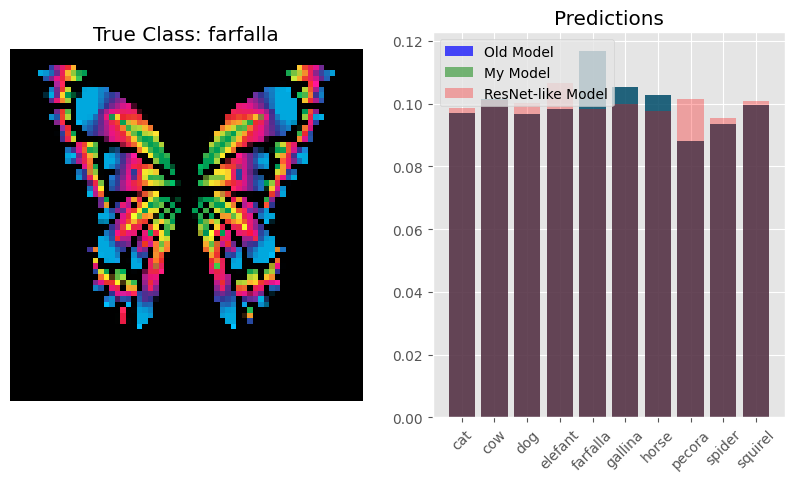

Class	Old_model	My_model	ResNet_like
cat	0.09715		0.09715		0.09876
cow	0.10143		0.10143		0.10103
dog	0.09665		0.09665		0.10007
elefant	0.09836		0.09836		0.10664
farfalla	0.11687		0.11687		0.09827
gallina	0.10546		0.10546		0.10000
horse	0.10262		0.10262		0.09770
pecora	0.08816		0.08816		0.10145
spider	0.09365		0.09365		0.09534
squirel	0.09966		0.09966		0.10073
Result:	farfalla		farfalla		elefant

Processing image: OIP-_zJyP5n6EgST1ooshBckeQHaE8.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


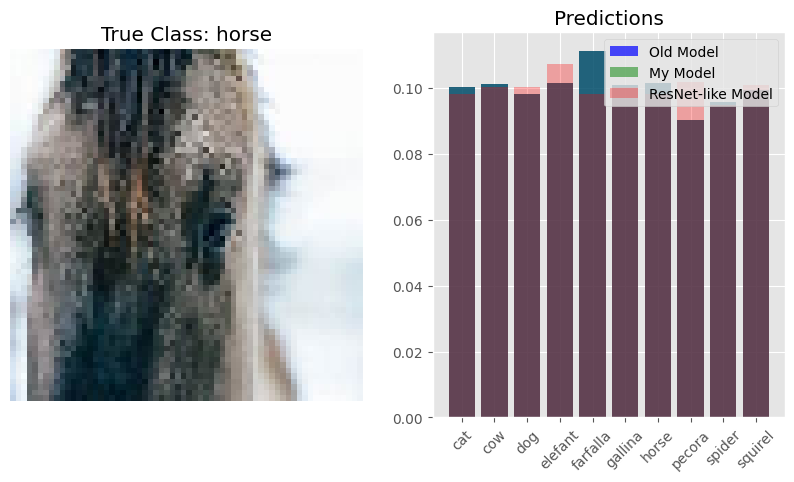

Class	Old_model	My_model	ResNet_like
cat	0.10020		0.10020		0.09821
cow	0.10126		0.10126		0.10034
dog	0.09821		0.09821		0.10021
elefant	0.10144		0.10144		0.10734
farfalla	0.11123		0.11123		0.09800
gallina	0.10097		0.10097		0.10013
horse	0.10159		0.10159		0.09810
pecora	0.09021		0.09021		0.10182
spider	0.09558		0.09558		0.09488
squirel	0.09932		0.09932		0.10097
Result:	farfalla		farfalla		elefant

Processing image: e837b20b28f7013ed1584d05fb1d4e9fe777ead218ac104497f5c97ca5ecb3b9_640.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


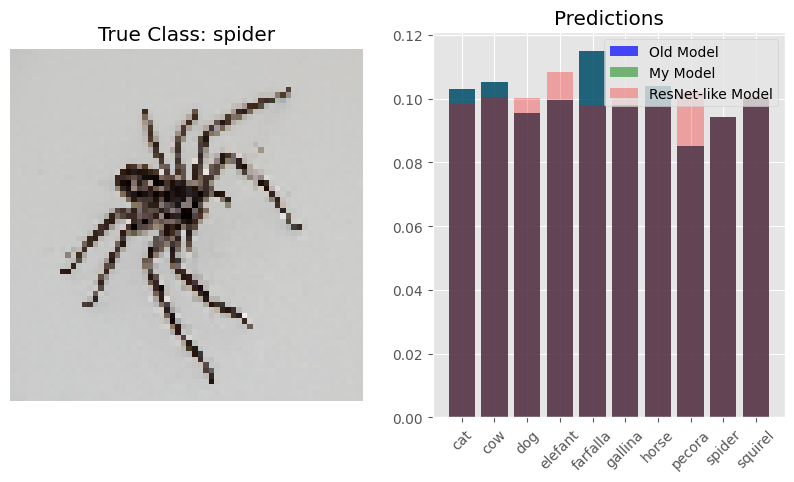

Class	Old_model	My_model	ResNet_like
cat	0.10293		0.10293		0.09819
cow	0.10525		0.10525		0.10038
dog	0.09559		0.09559		0.10013
elefant	0.09969		0.09969		0.10837
farfalla	0.11500		0.11500		0.09815
gallina	0.09804		0.09804		0.10014
horse	0.10395		0.10395		0.09772
pecora	0.08517		0.08517		0.10202
spider	0.09429		0.09429		0.09411
squirel	0.10009		0.10009		0.10080
Result:	farfalla		farfalla		elefant

Processing image: e834b20f2df4053ed1584d05fb1d4e9fe777ead218ac104497f5c97ca5ecb3b9_640.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


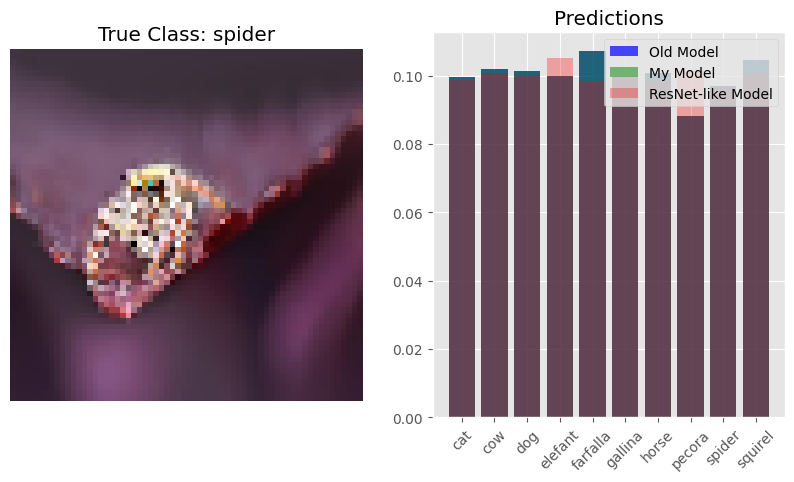

Class	Old_model	My_model	ResNet_like
cat	0.09965		0.09965		0.09874
cow	0.10193		0.10193		0.10088
dog	0.10142		0.10142		0.10026
elefant	0.09977		0.09977		0.10506
farfalla	0.10725		0.10725		0.09848
gallina	0.09949		0.09949		0.10000
horse	0.10080		0.10080		0.09828
pecora	0.08820		0.08820		0.10132
spider	0.09697		0.09697		0.09624
squirel	0.10452		0.10452		0.10076
Result:	farfalla		farfalla		elefant

Processing image: ea31b00821f71c22d2524518b7444f92e37fe5d404b0144390f8c770a1edb6_640.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


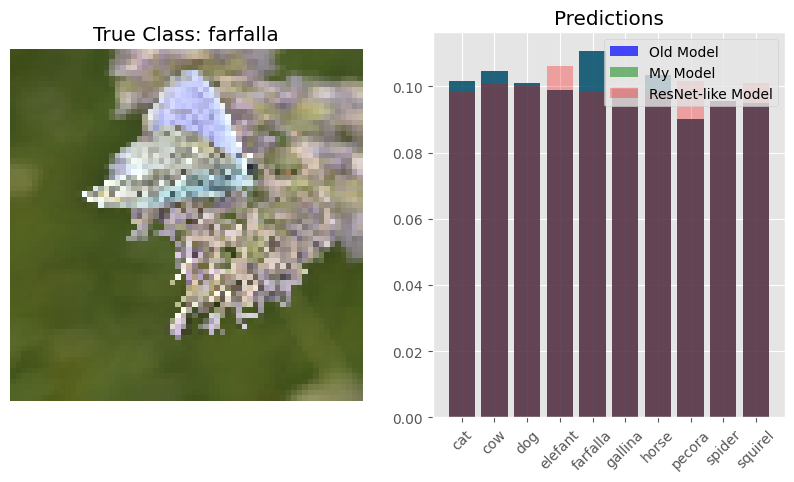

Class	Old_model	My_model	ResNet_like
cat	0.10162		0.10162		0.09836
cow	0.10449		0.10449		0.10077
dog	0.10093		0.10093		0.10019
elefant	0.09882		0.09882		0.10598
farfalla	0.11072		0.11072		0.09844
gallina	0.09924		0.09924		0.09988
horse	0.10351		0.10351		0.09820
pecora	0.09022		0.09022		0.10156
spider	0.09560		0.09560		0.09570
squirel	0.09487		0.09487		0.10092
Result:	farfalla		farfalla		elefant

Processing image: OIP-_K54-wf92Z07DTOdrqGnBQHaFj.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


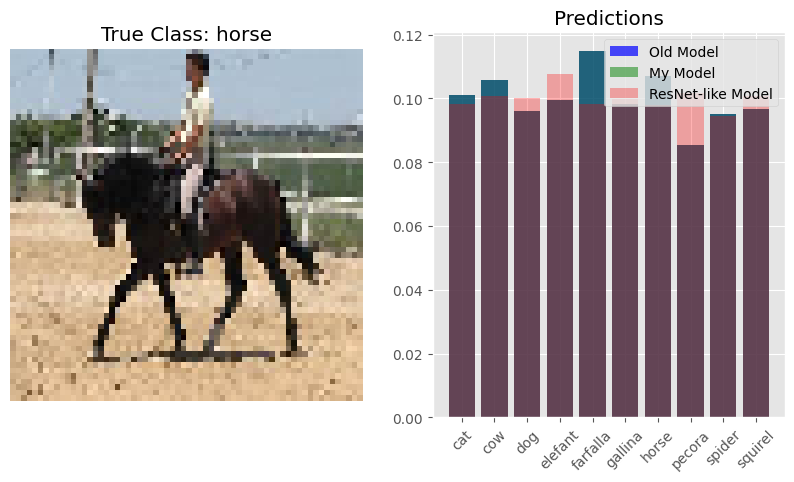

Class	Old_model	My_model	ResNet_like
cat	0.10105		0.10105		0.09818
cow	0.10578		0.10578		0.10068
dog	0.09600		0.09600		0.10019
elefant	0.09956		0.09956		0.10759
farfalla	0.11495		0.11495		0.09832
gallina	0.09828		0.09828		0.09996
horse	0.10698		0.10698		0.09788
pecora	0.08555		0.08555		0.10181
spider	0.09515		0.09515		0.09457
squirel	0.09671		0.09671		0.10082
Result:	farfalla		farfalla		elefant

Processing image: e83cb10620f2073ed1584d05fb1d4e9fe777ead218ac104497f5c978a4eebdbd_640.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


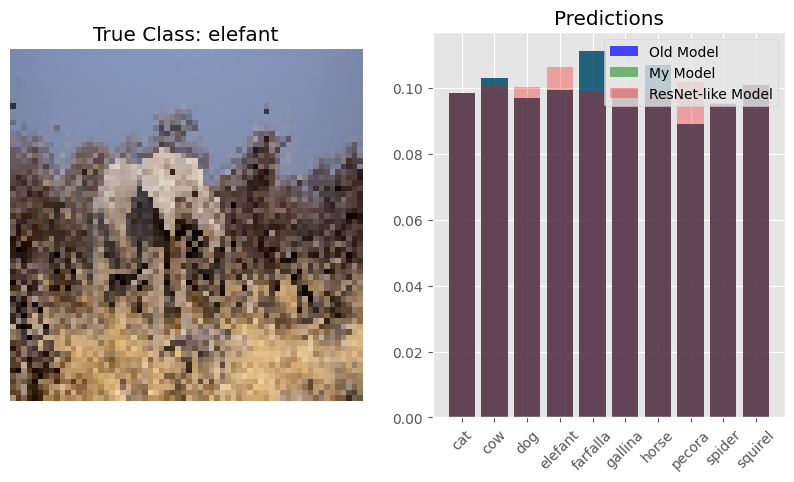

Class	Old_model	My_model	ResNet_like
cat	0.09830		0.09830		0.09837
cow	0.10282		0.10282		0.10064
dog	0.09690		0.09690		0.10021
elefant	0.09929		0.09929		0.10617
farfalla	0.11119		0.11119		0.09856
gallina	0.09969		0.09969		0.09985
horse	0.10702		0.10702		0.09821
pecora	0.08913		0.08913		0.10164
spider	0.09497		0.09497		0.09550
squirel	0.10069		0.10069		0.10086
Result:	farfalla		farfalla		elefant

Processing image: OIP-_2Il44HQzZrQQwqKl7oUOwHaFj.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


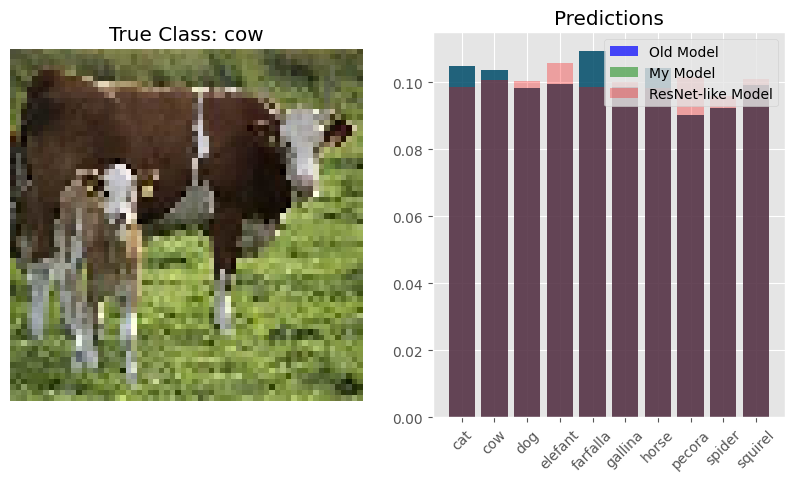

Class	Old_model	My_model	ResNet_like
cat	0.10477		0.10477		0.09853
cow	0.10372		0.10372		0.10073
dog	0.09816		0.09816		0.10022
elefant	0.09946		0.09946		0.10560
farfalla	0.10937		0.10937		0.09845
gallina	0.09870		0.09870		0.10006
horse	0.10423		0.10423		0.09816
pecora	0.09027		0.09027		0.10144
spider	0.09217		0.09217		0.09595
squirel	0.09916		0.09916		0.10087
Result:	farfalla		farfalla		elefant

Processing image: OIP-0T8A92vWXyIYCcmBW8BnmgHaEH.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


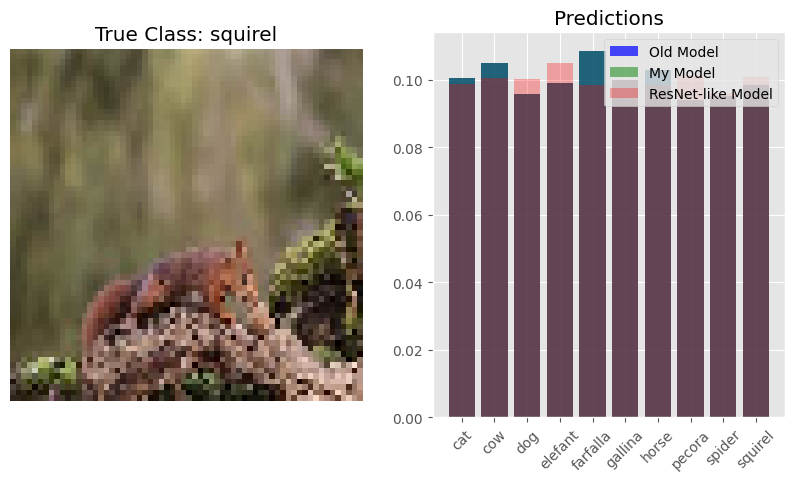

Class	Old_model	My_model	ResNet_like
cat	0.10058		0.10058		0.09870
cow	0.10505		0.10505		0.10070
dog	0.09583		0.09583		0.10016
elefant	0.09923		0.09923		0.10511
farfalla	0.10863		0.10863		0.09850
gallina	0.10000		0.10000		0.09991
horse	0.10299		0.10299		0.09853
pecora	0.09391		0.09391		0.10148
spider	0.09531		0.09531		0.09616
squirel	0.09847		0.09847		0.10074
Result:	farfalla		farfalla		elefant

Processing image: ea34b20a2ef5013ed1584d05fb1d4e9fe777ead218ac104497f5c97faeebb5bb_640.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


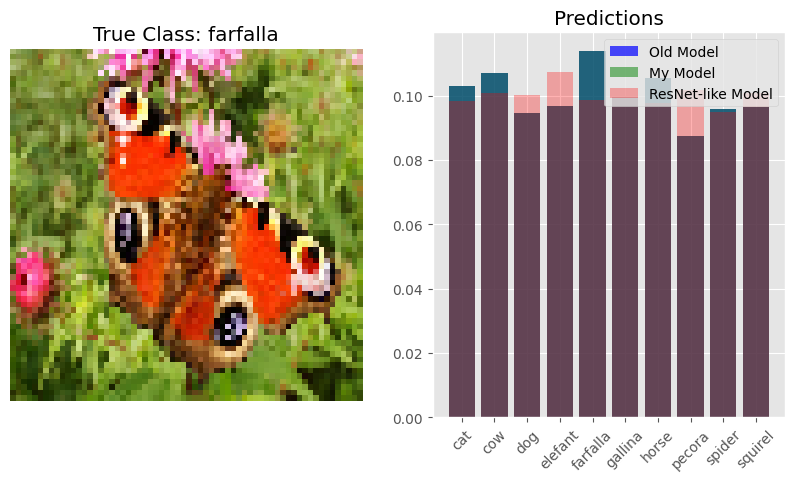

Class	Old_model	My_model	ResNet_like
cat	0.10309		0.10309		0.09836
cow	0.10687		0.10687		0.10079
dog	0.09447		0.09447		0.10010
elefant	0.09690		0.09690		0.10722
farfalla	0.11393		0.11393		0.09870
gallina	0.09958		0.09958		0.09952
horse	0.10544		0.10544		0.09773
pecora	0.08744		0.08744		0.10174
spider	0.09577		0.09577		0.09497
squirel	0.09651		0.09651		0.10087
Result:	farfalla		farfalla		elefant

Processing image: 53.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


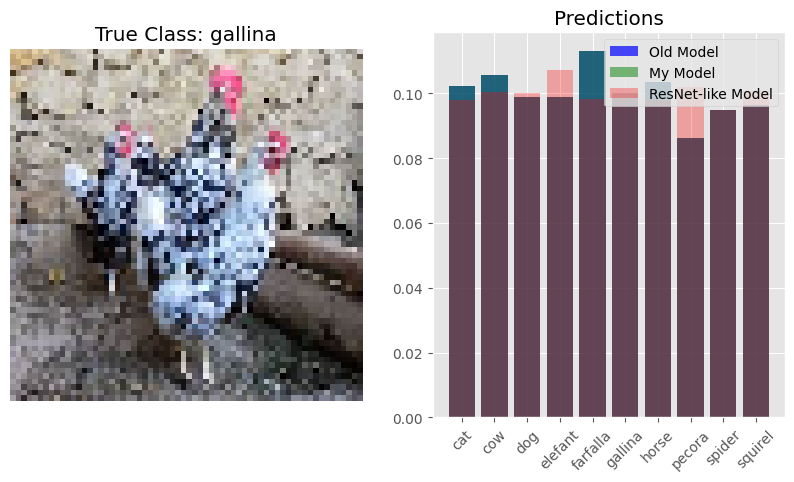

Class	Old_model	My_model	ResNet_like
cat	0.10228		0.10228		0.09809
cow	0.10579		0.10579		0.10057
dog	0.09880		0.09880		0.10016
elefant	0.09882		0.09882		0.10738
farfalla	0.11317		0.11317		0.09841
gallina	0.10028		0.10028		0.09992
horse	0.10339		0.10339		0.09789
pecora	0.08625		0.08625		0.10185
spider	0.09479		0.09479		0.09485
squirel	0.09642		0.09642		0.10089
Result:	farfalla		farfalla		elefant

Processing image: e832b40a20f61c22d2524518b7444f92e37fe5d404b0144390f8c47ba6edbc_640.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


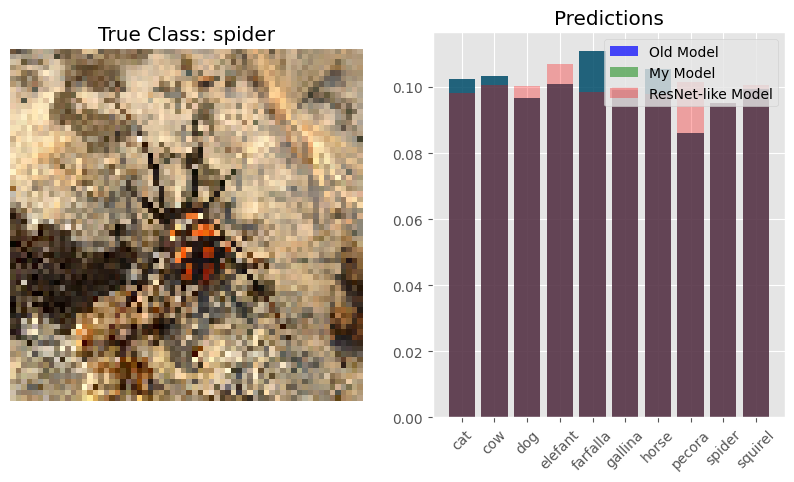

Class	Old_model	My_model	ResNet_like
cat	0.10238		0.10238		0.09835
cow	0.10345		0.10345		0.10063
dog	0.09678		0.09678		0.10020
elefant	0.10086		0.10086		0.10686
farfalla	0.11099		0.11099		0.09860
gallina	0.09922		0.09922		0.10000
horse	0.10540		0.10540		0.09790
pecora	0.08612		0.08612		0.10164
spider	0.09525		0.09525		0.09509
squirel	0.09955		0.09955		0.10072
Result:	farfalla		farfalla		elefant

Processing image: ea33b50c2afd1c22d2524518b7444f92e37fe5d404b0144390f8c770a2e9b5_640.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


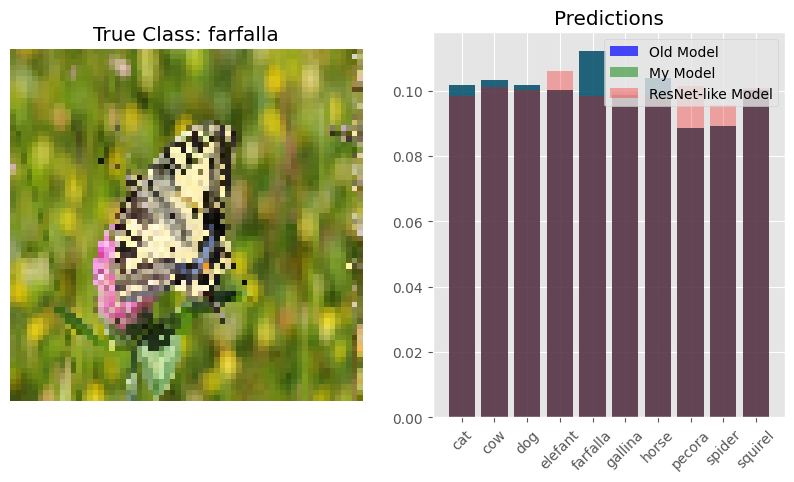

Class	Old_model	My_model	ResNet_like
cat	0.10162		0.10162		0.09853
cow	0.10332		0.10332		0.10100
dog	0.10179		0.10179		0.10021
elefant	0.10017		0.10017		0.10605
farfalla	0.11221		0.11221		0.09834
gallina	0.09883		0.09883		0.09990
horse	0.10389		0.10389		0.09797
pecora	0.08869		0.08869		0.10153
spider	0.08927		0.08927		0.09573
squirel	0.10022		0.10022		0.10075
Result:	farfalla		farfalla		elefant

Processing image: OIP-_MCd8TBNEv9o4vwFWCYbiwHaFK.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


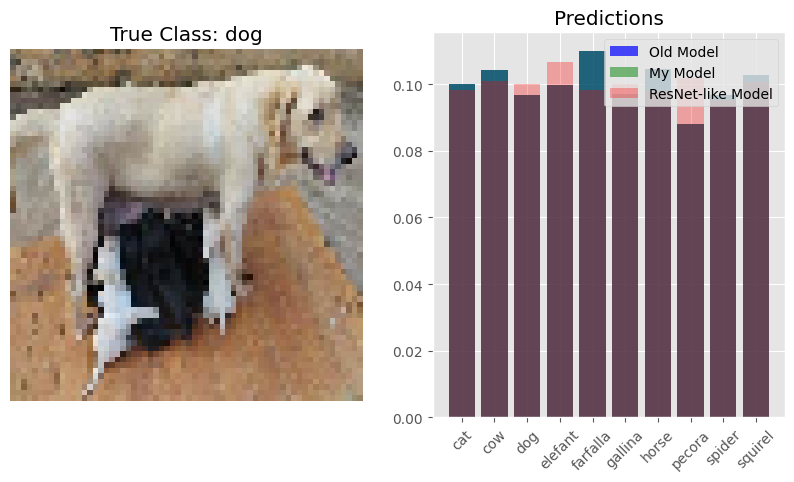

Class	Old_model	My_model	ResNet_like
cat	0.10017		0.10017		0.09822
cow	0.10419		0.10419		0.10084
dog	0.09677		0.09677		0.10016
elefant	0.09984		0.09984		0.10664
farfalla	0.11001		0.11001		0.09838
gallina	0.09694		0.09694		0.10007
horse	0.10464		0.10464		0.09799
pecora	0.08790		0.08790		0.10173
spider	0.09675		0.09675		0.09517
squirel	0.10279		0.10279		0.10079
Result:	farfalla		farfalla		elefant

Processing image: OIP-_yOgn7ZlG5BlAKGYGdo26gAAAA.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


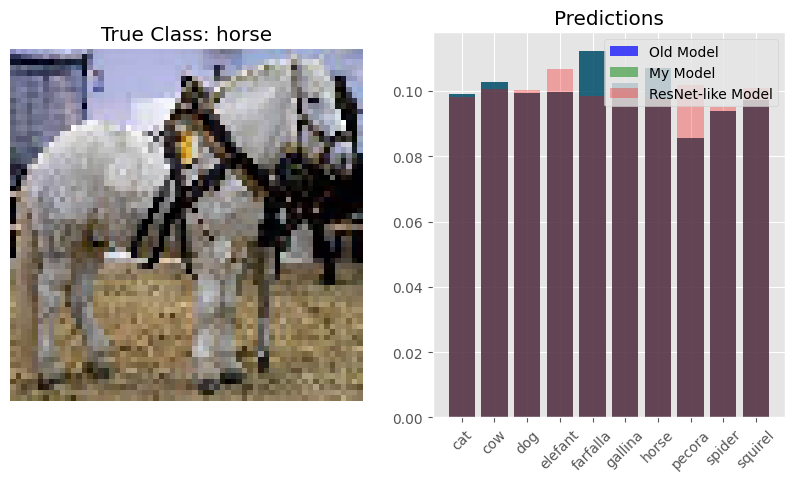

Class	Old_model	My_model	ResNet_like
cat	0.09921		0.09921		0.09825
cow	0.10285		0.10285		0.10065
dog	0.09952		0.09952		0.10026
elefant	0.09971		0.09971		0.10683
farfalla	0.11233		0.11233		0.09843
gallina	0.10239		0.10239		0.09995
horse	0.10694		0.10694		0.09795
pecora	0.08576		0.08576		0.10178
spider	0.09400		0.09400		0.09500
squirel	0.09730		0.09730		0.10089
Result:	farfalla		farfalla		elefant


Final Accuracy:
Old Model Accuracy: 26.67%
My Model Accuracy: 26.67%
ResNet-like Model Accuracy: 6.67%


In [215]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from imutils import paths
import random
import os

# Загрузка моделей
model_1 = load_model('/content/best_model_my.keras')  # Модель 1
model_2 = load_model('/content/best_model_my.keras')  # Модель 2
model_3 = load_model('/content/best_model_resnet_like.keras')  # Модель 3

# Проверка архитектуры моделей
print("Model 1 Summary:")
model_1.summary()

print("\nModel 2 Summary:")
model_2.summary()

print("\nModel 3 Summary:")
model_3.summary()

# Функция для загрузки и подготовки изображений
def load_and_prepare_image(image_path, target_size=(64, 64)):
    img = image.load_img(image_path, target_size=target_size)
    img_array = image.img_to_array(img) / 255.0  # Нормализация
    return img_array

# Функция для предсказания
def predict_image(img_array, model):
    img_input = img_array.reshape((1, 64, 64, 3))
    preds = model.predict(img_input)[0]
    return preds

# Путь к директории с изображениями
imagesPath = sorted(list(paths.list_images('/content/drive/MyDrive/animals/')))
random.shuffle(imagesPath)  # Перемешиваем изображения

# Автоматическое создание списка классов из структуры директорий
class_labels = sorted(os.listdir('/content/drive/MyDrive/animals/'))

# Ограничиваемся 15 изображениями
images_to_test = imagesPath[:15]

# Сравнение моделей
results = {
    'model_1_correct': 0,
    'model_2_correct': 0,
    'model_3_correct': 0,
}

# Обработка изображений
for img_path in images_to_test:
    print(f"Processing image: {os.path.basename(img_path)}")
    img_array = load_and_prepare_image(img_path)

    # Получаем истинный класс из пути
    true_class = os.path.basename(os.path.dirname(img_path))  # Например, 'cat', 'dog' и т.д.

    # Пропускаем изображения с неизвестными классами
    if true_class not in class_labels:
        print(f"Skipping image {os.path.basename(img_path)}: unknown class '{true_class}'")
        continue

    true_class_idx = class_labels.index(true_class)  # Индекс истинного класса

    # Предсказания моделей
    preds_1 = predict_image(img_array, model_1)
    preds_2 = predict_image(img_array, model_2)
    preds_3 = predict_image(img_array, model_3)

    # Сравнение предсказаний с истинным классом
    if np.argmax(preds_1) == true_class_idx:
        results['model_1_correct'] += 1
    if np.argmax(preds_2) == true_class_idx:
        results['model_2_correct'] += 1
    if np.argmax(preds_3) == true_class_idx:
        results['model_3_correct'] += 1

    # Визуализация результатов для текущего изображения
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(img_array)
    plt.axis('off')
    plt.title(f"True Class: {true_class}")

    plt.subplot(1, 2, 2)
    # Используем только первые 4 класса для гистограммы
    plt.bar(class_labels[:10], preds_1, color='blue', alpha=0.7, label='Old Model')
    plt.bar(class_labels[:10], preds_2, color='green', alpha=0.5, label='My Model')
    plt.bar(class_labels[:10], preds_3, color='red', alpha=0.3, label='ResNet-like Model')
    plt.xticks(rotation=45)
    plt.title("Predictions")
    plt.legend()
    plt.show()

    # Вывод предсказаний
    print('Class\tOld_model\tMy_model\tResNet_like')
    for i in range(len(preds_1)):
        print(f'{class_labels[i]}\t{preds_1[i]:.5f}\t\t{preds_2[i]:.5f}\t\t{preds_3[i]:.5f}')
    print(f'Result:\t{class_labels[np.argmax(preds_1)]}\t\t{class_labels[np.argmax(preds_2)]}\t\t{class_labels[np.argmax(preds_3)]}\n')

# Вывод итоговой точности
total_images = len(images_to_test)
print("\nFinal Accuracy:")
print(f"Old Model Accuracy: {results['model_1_correct'] / total_images * 100:.2f}%")
print(f"My Model Accuracy: {results['model_2_correct'] / total_images * 100:.2f}%")
print(f"ResNet-like Model Accuracy: {results['model_3_correct'] / total_images * 100:.2f}%")

# Задание №3*. Использование глубокой сверточной нейронной сети для восстановления изображения

## 3.1. Работа с данными

Будем работать с набором данным `fetch_olivetti_faces` из `sklearn`.

### 3.1.1. Переведите векторы в настоящие изображения из двух размерностей

In [216]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split

data, _ = fetch_olivetti_faces(return_X_y=True)
train, test = train_test_split(data, test_size=0.2, random_state=4)

In [217]:
train.shape

(320, 4096)

Сейчас изображение - это вектор, имеющий размерность 4096.

In [218]:
# Ваш код здесь

train = train.reshape((train.shape[0], 64, 64))
test = test.reshape((test.shape[0], 64, 64))

test.shape

(80, 64, 64)

### 3.1.2. Отрисуйте несколько примеров

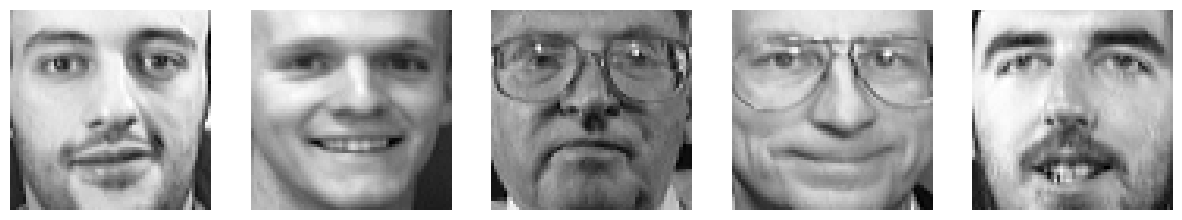

In [219]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(1, 5, figsize=(15, 10))

for i in range(5):
    ax[i].imshow(train[i], cmap='gray')
    ax[i].axis('off')

Поделим данные на X и y, где X - это верхняя часть лица человека, на этом модель будет обучаться, а y - это нижняя часть лица человека - её будем предсказывать.

In [220]:
n_pixels = train.shape[1]

# Upper half of the faces
X_train = train[:, :(n_pixels + 1) // 2, :]
# Lower half of the faces
y_train = train[:, n_pixels // 2:, :]


X_test = test[:, :(n_pixels + 1) // 2, :]
y_test = test[:, n_pixels // 2:, :]

In [221]:
X_train.shape

(320, 32, 64)

Вот один пример обучающей пары.

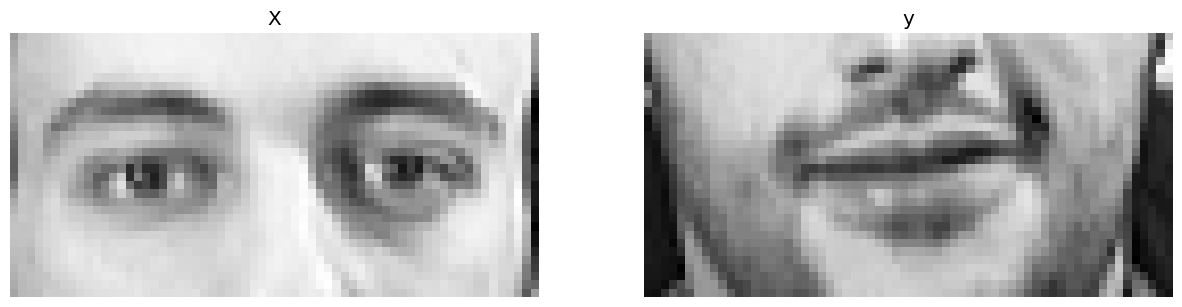

In [222]:
import matplotlib.pyplot as plt

idx = 0

fig, ax = plt.subplots(1, 2, figsize=(15, 8))
ax[0].imshow(X_train[idx], cmap='gray')
ax[0].set_title('X')
ax[1].imshow(y_train[idx], cmap='gray')
ax[1].set_title('y')
ax[0].axis('off')
ax[1].axis('off')

plt.show()

### 3.1.3. Измените размерность y
Остается только изменить размерность y, т.к. сейчас $y$ - картинка 32x64, а выход нейронной сети у нас будет одномерный и равный 32 * 64 = 2048.

In [223]:
y_train_n = y_train.reshape(y_train.shape[0], 32 * 64)
y_test_n = y_test.reshape(y_test.shape[0], 32 * 64)

y_train_n.shape

(320, 2048)

## 3.2. Создайте архитектуру для этой задачи

In [224]:
# Ваш код здесь
model_rec = Sequential([
    Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(32, 64, 1)),
    MaxPooling2D((2,2), strides=2),

    Conv2D(128, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2), strides=2),

    Conv2D(256, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2), strides=2),

    Flatten(),
    Dense(512, activation='relu'),
    Dense(1024, activation='relu'),

    Dense(2048, activation='sigmoid'),
])

model_rec.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_33"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_83 (Conv2D)                   │ (None, 32, 64, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_68 (MaxPooling2D)      │ (None, 16, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_84 (Conv2D)                   │ (None, 16, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_69 (MaxPooling2D)      │ (None, 8, 16, 128)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_85 (Conv2D)                   │ (None, 8, 16, 256)          │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_70 (MaxPooling2D)      │ (None, 4, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_27 (Flatten)                 │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_75 (Dense)                     │ (None, 512)                 │       4,194,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_76 (Dense)                     │ (None, 1024)                │         525,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_77 (Dense)                     │ (None, 2048)                │       2,099,200 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,188,992 (27.42 MB)

 Trainable params: 7,188,992 (27.42 MB)

 Non-trainable params: 0 (0.00 B)

## 3.3. Скомпилируйте сеть

Подберите нужную функцию потерь и метрику. Оптимизатор можете использовать 'adam'

In [225]:
# Ваш код здесь
model_rec.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

## 3.4. Обучите нейросеть

Выберите нужное количество эпох.


In [226]:
# Ваш код здесь
EPOCH = 100

checkpoint = ModelCheckpoint(filepath="best_model_rec.keras", monitor="val_accuracy", save_best_only=True, verbose=0)

history_rec = model_rec.fit(X_train, y_train_n, batch_size=32, epochs=EPOCH, validation_split=0.2, callbacks=[early_stopping, checkpoint])

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 191ms/step - accuracy: 8.6806e-04 - loss: 0.0253 - val_accuracy: 0.0000e+00 - val_loss: 0.0228
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.0000e+00 - loss: 0.0216 - val_accuracy: 0.0000e+00 - val_loss: 0.0216
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.0000e+00 - loss: 0.0208 - val_accuracy: 0.0000e+00 - val_loss: 0.0217
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - accuracy: 8.6806e-04 - loss: 0.0209 - val_accuracy: 0.0156 - val_loss: 0.0214
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.0184 - loss: 0.0203 - val_accuracy: 0.0156 - val_loss: 0.0213
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.0163 - loss: 0.0204 - val_accuracy: 0.0156 - val_loss: 0.0216
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.0082 - loss: 0.0199 - val_accuracy: 0.0000e+00 - val_loss: 0.0203
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.0268 - loss: 0.0192 -

## 3.5. Сделайте предсказания на тестовых данных

In [227]:
# Ваш код здесь
preds = model_rec.predict(X_test, batch_size=10)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step  


## 3.6. Посчитайте метрику качества на тестовых данных

In [228]:
# Ваш код здесь

from sklearn.metrics import mean_squared_error

mean_squared_error(preds, y_test_n)

0.008892272599041462

## 3.7. Преобразуйте предсказанные векторы в двумерное изображение (поменяйте их размерность)

In [229]:
preds.shape

(80, 2048)

In [230]:
# Ваш код здесь
pred_test = preds.reshape(preds.shape[0], 32, 64)

Отрисуйте все предсказания.

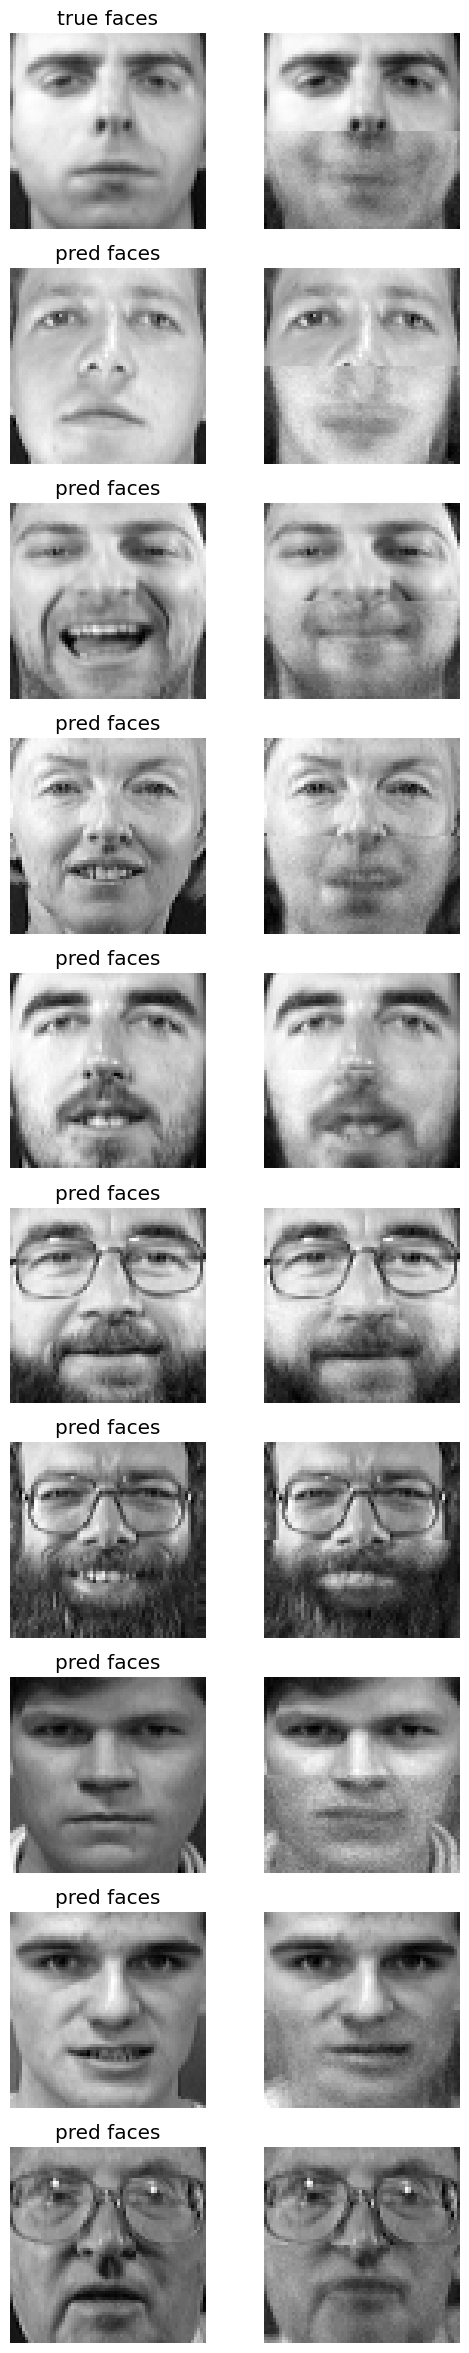

In [231]:
# Пример кода:

n_faces = 10
n_cols = 2
image_shape = (64, 64)
plt.figure(figsize=(3 * n_cols, 3 * n_faces))


for i in range(10):
    true_face = np.vstack((X_test[i], y_test[i]))

    if i:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1, title='pred faces')
    else:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1, title="true faces")

    sub.axis("off")
    sub.imshow(
        true_face.reshape(image_shape), cmap=plt.cm.gray, interpolation="nearest"
    )

    completed_face = np.vstack((X_test[i], pred_test[i]))

    if i:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 2)

    else:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 2)

    sub.axis("off")
    sub.imshow(
        completed_face.reshape(image_shape),
        cmap=plt.cm.gray,
        interpolation="nearest",
    )